<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/Lab_10_Ensembling_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generating dataset

In [0]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

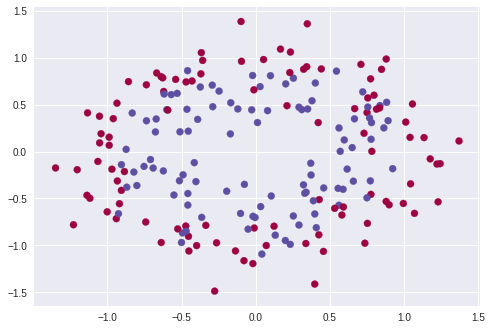

In [21]:
X, y = make_circles(n_samples=200, noise=0.2, factor=0.7)

X.shape, set(y), np.count_nonzero(y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [0]:
cm = ListedColormap(['#FF0000', '#0000FF'])

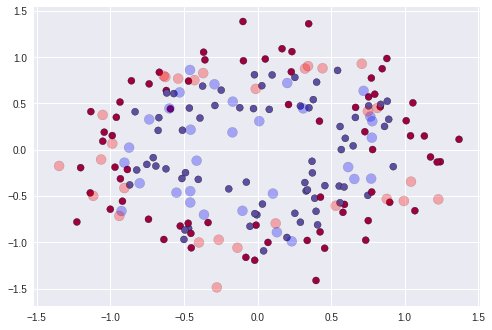

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, s=100, alpha=0.3, edgecolors='k')

## Q1:

### Build classifiers

In [0]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [0]:
svm = SVC()
dt = DecisionTreeClassifier(max_depth=10)
lr = LogisticRegression()

In [26]:
svm.fit(X, y)
dt.fit(X, y)
lr.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
voting_clf = VotingClassifier(estimators=[('svm', svm),
                                          ('dt', dt),
                                          ('lr', lr)],
                              voting='hard')

In [28]:
voting_clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)), ('dt', DecisionTreeClassifier(class_weight...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

### Get accuracy score

In [0]:
from sklearn.metrics import accuracy_score

In [30]:
for clf in [svm, dt, lr, voting_clf]:
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8333333333333334
DecisionTreeClassifier 0.9833333333333333
LogisticRegression 0.55
VotingClassifier 0.8833333333333333


### Plotting Decision Boundaries

In [0]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

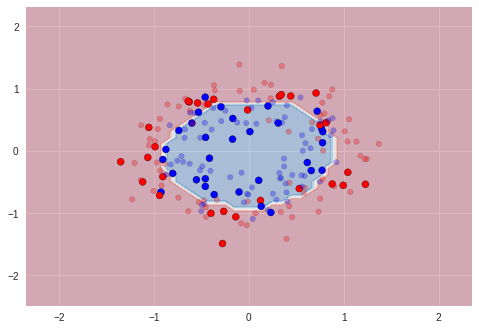

In [32]:
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, edgecolors='k')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, edgecolors='k', s=30, alpha=0.3)

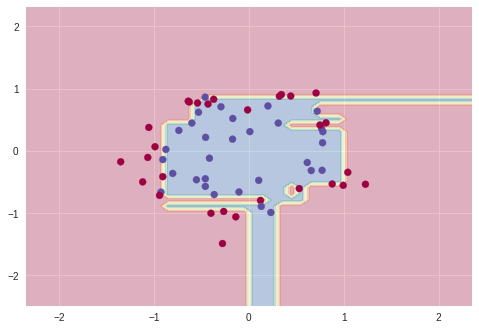

In [33]:
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral)

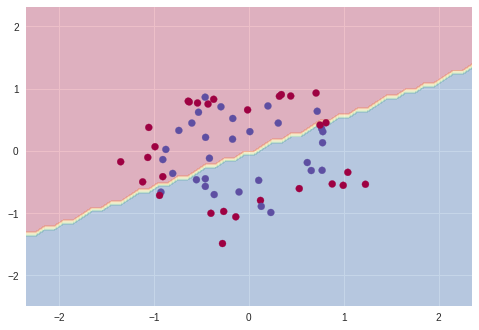

In [34]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral)

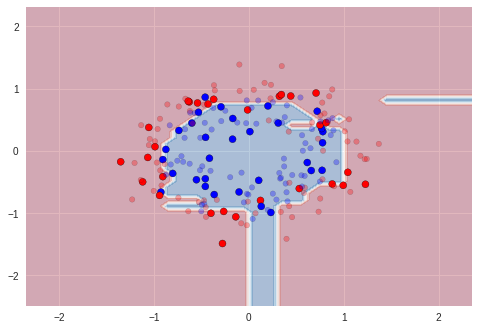

In [35]:
Z = voting_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, edgecolors='k')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, edgecolors='k', s=30, alpha=0.3)

### Validation Curve

In [0]:
from sklearn.model_selection import cross_val_score

In [37]:
#??? TODO: Verify cv_scores: why trend of change in voting_clf_cv_scores is different from that in dt_cv_scores??

voting_clf_cv_scores = []
dt_cv_scores = []
svm_cv_scores = []
lr_cv_scores = []

for depth in range(1, 11):
    voting_clf.named_estimators_.dt.max_depth = depth
    
    voting_clf_cv_score = np.average(cross_val_score(voting_clf, X, y, cv=3))
    voting_clf_cv_scores.append(voting_clf_cv_score)
    
    dt_cv_score = np.average(cross_val_score(voting_clf.named_estimators_.dt, X, y, cv=3))
    dt_cv_scores.append(dt_cv_score)
    
    svm_cv_score = np.average(cross_val_score(voting_clf.named_estimators_.svm, X, y, cv = 3))
    svm_cv_scores.append(svm_cv_score)
    
    lr_cv_score = np.average(cross_val_score(voting_clf.named_estimators_.lr, X, y, cv = 3))
    lr_cv_scores.append(lr_cv_score)

voting_clf_cv_scores

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.7302436125965537,
 0.7250445632798573,
 0.7250445632798573,
 0.7201426024955436,
 0.7250445632798573,
 0.7250445632798573,
 0.7199940582293524,
 0.7351455733808674,
 0.7300950683303625,
 0.7199940582293524]

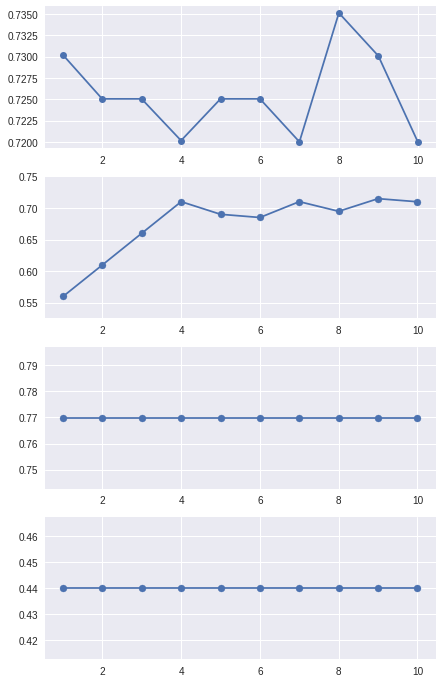

In [61]:
#TODO: make same y-scale for all subplots

plt.figure(1, figsize=(7, 12))

plt.subplot(411)
# plt.scatter(range(1, 11), voting_clf_cv_scores)
plt.plot(range(1, 11), voting_clf_cv_scores, 'o-')
# plt.ylim(0, 1)
# plt.yticks(np.arange(min(voting_clf_cv_scores) - 0.1, max(voting_clf_cv_scores) + 0.1, step=0.1))
plt.plot()

plt.subplot(412)
plt.scatter(range(1, 11), dt_cv_scores)
plt.plot(range(1, 11), dt_cv_scores)

plt.subplot(413)
plt.scatter(range(1, 11), svm_cv_scores)
plt.plot(range(1, 11), svm_cv_scores)

plt.subplot(414)
plt.scatter(range(1, 11), lr_cv_scores)
plt.plot(range(1, 11), lr_cv_scores)

plt.show()